In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('bank_marketing.csv')
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


#### Obtener la información de dicha base de datos que incluya el número de registros, el total de variables, el tipo de cada variable, la cantidad de datos perdidos de cada variable en caso de que existan.

In [96]:
num_registros = data.shape[0]
num_variables = data.shape[1]
tipos_variables = data.info()
datos_perdidos = data.isnull().sum()

print(f'Número de registros: {num_registros}')
print(f'Número de variables: {num_variables}')
print('Tipos de variables:')
print(tipos_variables)
print('Datos perdidos por variable:')
print(datos_perdidos)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB
Número de registros: 9000
Número de variables: 17
Tipos de variables:
None
Datos perdidos por variabl

#### Transforma las variables categóricas de manera que puedan ser tratadas numéricamente.

In [97]:
# Transformación con LabelEncoder para la variable de salida y las variables binarias
label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])
data['default'] = label_encoder.fit_transform(data['default'])
data['housing'] = label_encoder.fit_transform(data['housing'])
data['loan'] = label_encoder.fit_transform(data['loan'])


# OneHotEncoder para las variables categóricas sin orden
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)


#### Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo.

In [98]:
def fun3(X):
    return (X - np.min(X)) / (np.max(X) - np.min(X))

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


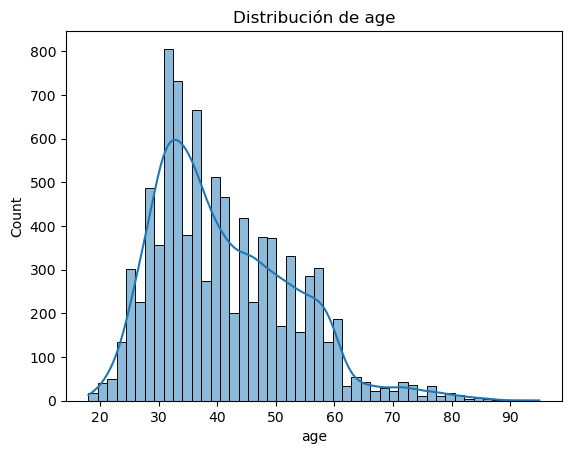

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


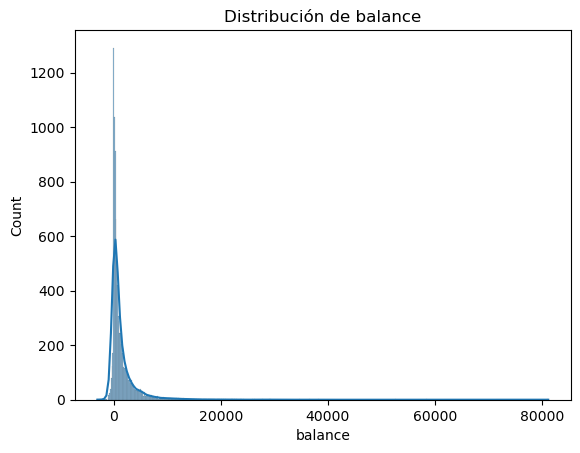

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


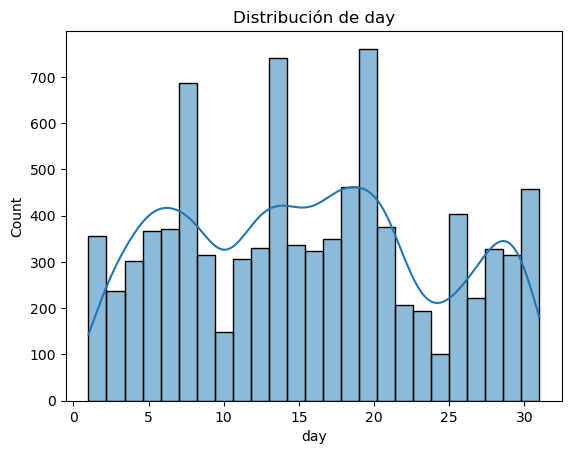

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


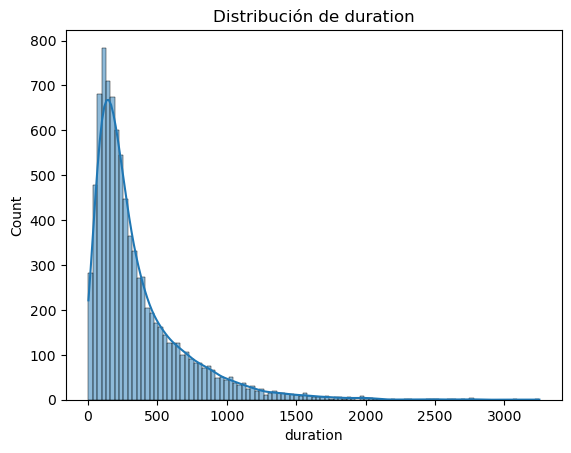

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


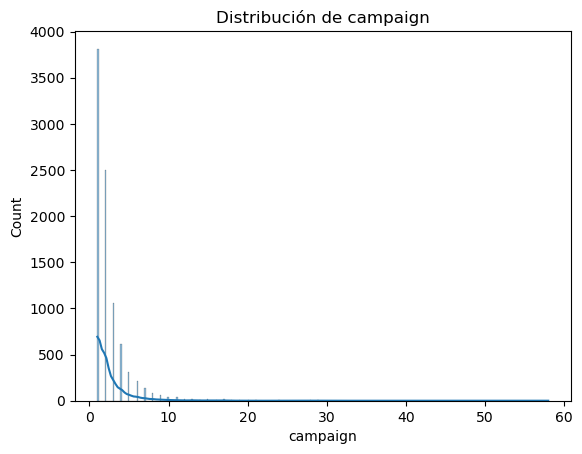

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


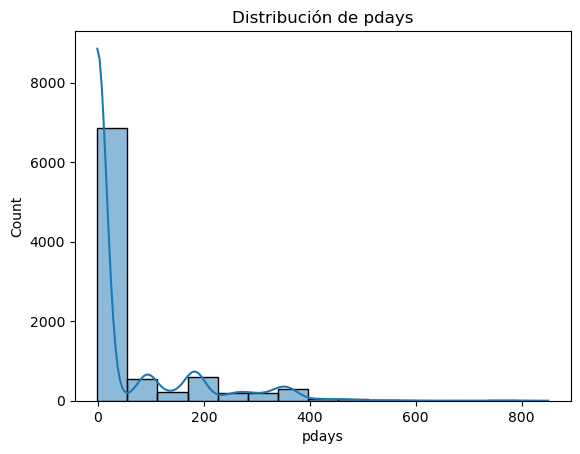

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


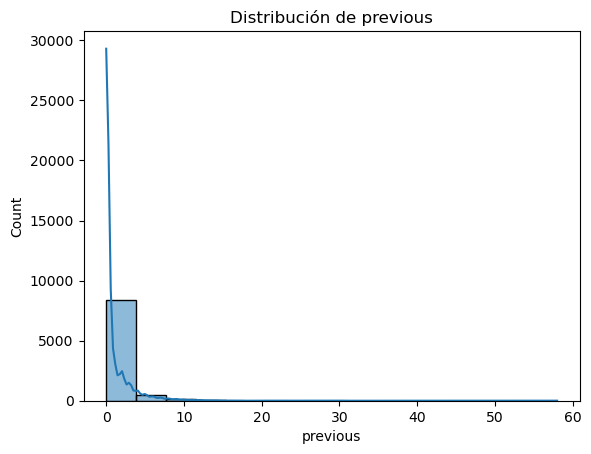

In [99]:
# Verificación de sesgo en las variables numéricas
import matplotlib.pyplot as plt
import seaborn as sns

numericas = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for col in numericas:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

data['balance'] = fun3(data['balance'])
data['duration'] = np.log1p(data['duration'])
data['campaign'] = np.log1p(data['campaign'])
data['pdays'] = fun3(data['pdays'])
data['previous'] = np.log1p(data['previous'])


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


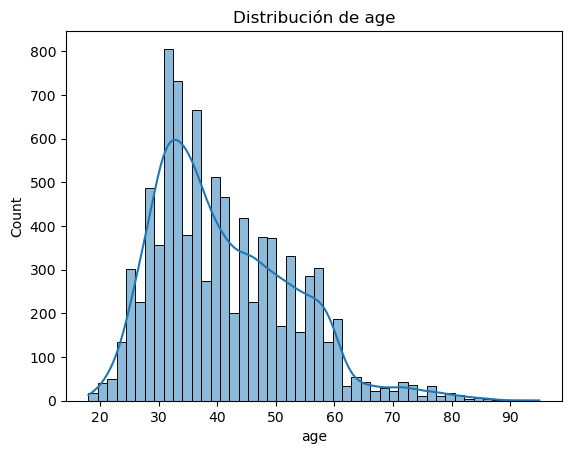

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


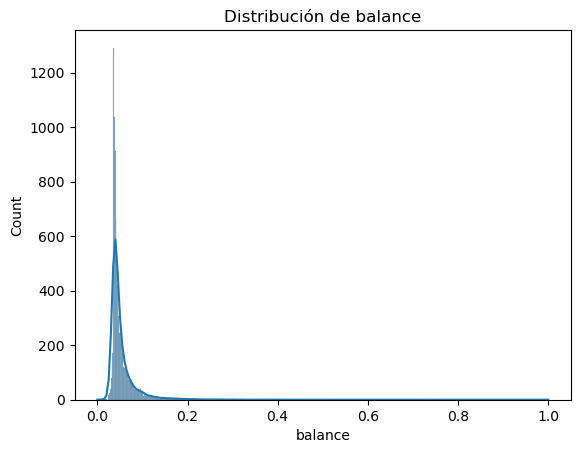

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


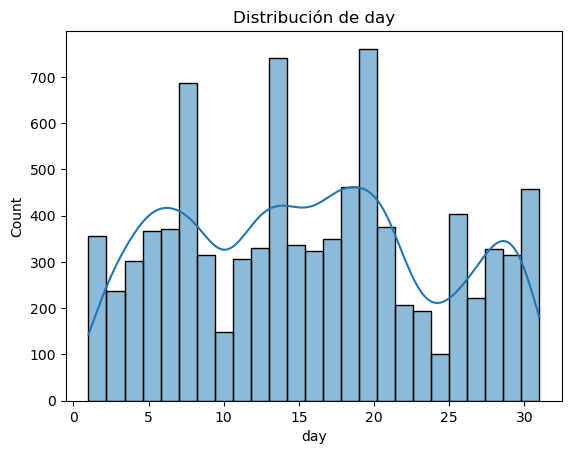

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


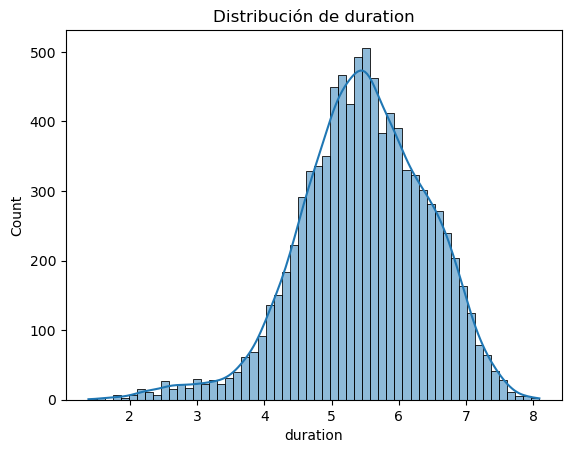

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


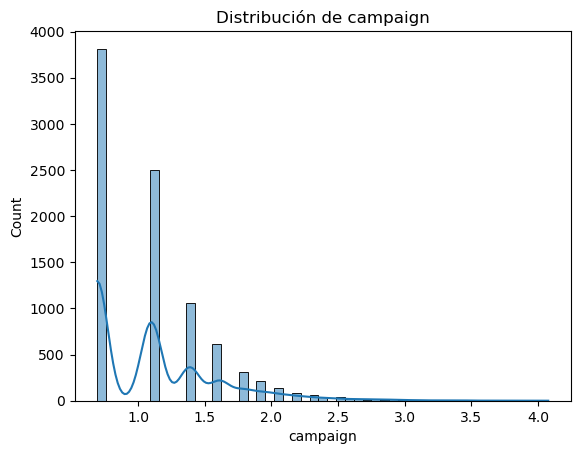

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


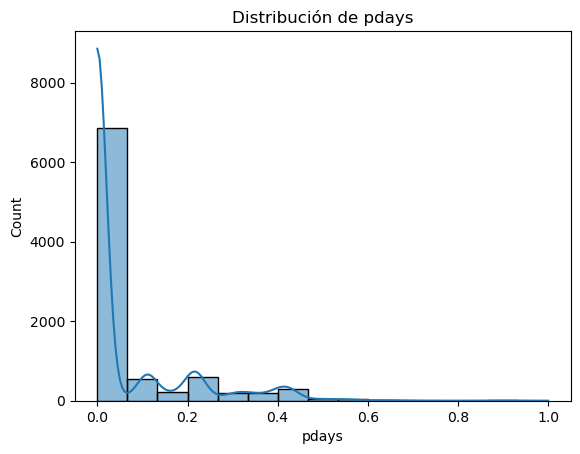

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


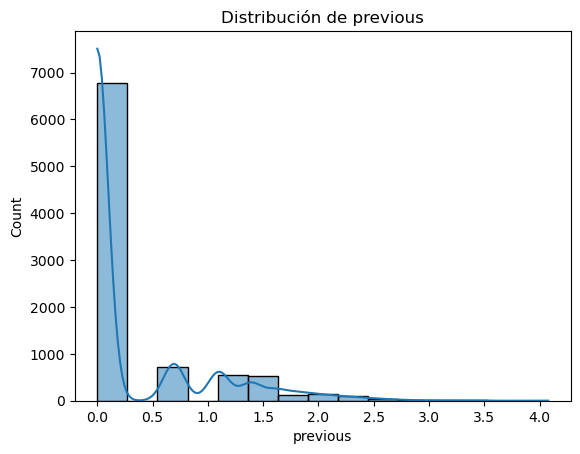

In [48]:
for col in numericas:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

#### Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente.

In [101]:
# Variables independientes y dependientes
X = data.drop('y', axis=1)
y = data['y']

# División en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Dimensión X_train_set:\t\t", X_train.shape)
print("Dimensión X_validation_set:\t", X_validation.shape)
print("Dimension X_test_set:\t\t", X_test.shape)

print("\nDimensión Y_train:\t\t", y_train.shape)
print("Dimensión Y_validation:\t\t", y_validation.shape)
print("Dimensión Y_test:\t\t", y_test.shape)

Dimensión X_train_set:		 (5400, 42)
Dimensión X_validation_set:	 (1800, 42)
Dimension X_test_set:		 (1800, 42)

Dimensión Y_train:		 (5400,)
Dimensión Y_validation:		 (1800,)
Dimensión Y_test:		 (1800,)


In [50]:
# Verificar si existen valores NaN en el conjunto de entrada X
nan_values = X.isnull().sum()

# Mostrar únicamente las variables que contienen valores NaN
print(nan_values[nan_values > 0])


Series([], dtype: int64)


#### Aplica el modelo Regresión Logística

In [51]:
clf = LogisticRegression(C=1.0, solver='newton-cg')
modelo_RL = clf.fit(X_train, y_train)
print("Regresión Logística:\nExactitud (accuracy) con el conjunto de validación =", modelo_RL.score(X_validation, y_validation))

Regresión Logística:
Exactitud (accuracy) con el conjunto de validación = 0.8172222222222222


#### Matriz de confusión

In [52]:
pr = modelo_RL.predict(X_validation)
confusion_matrix(y_validation, pr)

array([[895, 163],
       [166, 576]], dtype=int64)

In [56]:
pr = modelo_RL.predict(X_test)
sum(abs(np.ravel(y_test)-pr)) / pr.shape[0]

0.16777777777777778

#### Ajutando hiperparametros

In [58]:
parameters = {'C':[0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3],
              'penalty':('l2','elasticnet','none'),
              'solver':('newton-cg', 'saga', 'lbfgs', 'sag')}

In [59]:
from sklearn.model_selection import GridSearchCV

RL_grid = LogisticRegression(max_iter=1000)
modelo_RL_grid = GridSearchCV(RL_grid, parameters)

modelo_RL_grid.fit(X_train, np.ravel(y_train))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3],
                         'penalty': ('l2', 'elasticnet', 'none'),
                         'solver': ('newton-cg', 'saga', 'lbfgs', 'sag')})

In [109]:
print(modelo_RL_grid)

print("Los mejores valores encontrados son %s con un score de %0.2f" % (modelo_RL_grid.best_params_,modelo_RL_grid.best_score_))
print(modelo_RL_grid.score(X_validation, y_validation))

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3],
                         'penalty': ('l2', 'elasticnet', 'none'),
                         'solver': ('newton-cg', 'saga', 'lbfgs', 'sag')})
Los mejores valores encontrados son {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'} con un score de 0.82
0.8161111111111111


In [107]:
modelo_RL_tmp = LogisticRegression(C=0.1, penalty='none', solver='newton-cg', max_iter=100)
modelo_RL_tmp.fit(X_train, np.ravel(y_train))

print(modelo_RL_tmp.score(X_validation, y_validation))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


0.8161111111111111


In [62]:
pr = modelo_RL_tmp.predict(X_validation)
confusion_matrix(y_validation, pr)

array([[892, 166],
       [165, 577]], dtype=int64)

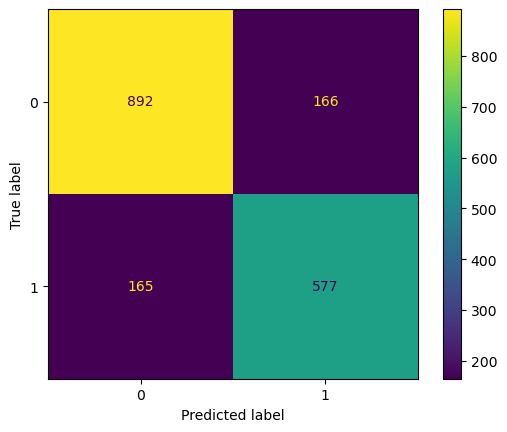

In [104]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = modelo_RL_tmp.predict(X_validation)
cm = confusion_matrix(y_validation, pr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()

plt.show()

In [110]:
print(modelo_RL_tmp.score(X_test, y_test))

0.8333333333333334


#### Red neuronal

In [53]:
modelo_NN = MLPClassifier(hidden_layer_sizes=(100,25), max_iter=1000)
modelo_NN.fit(X_train, y_train)
print(modelo_NN.score(X_validation, y_validation))

0.8255555555555556


In [54]:
prn = modelo_NN.predict(X_validation)
confusion_matrix(y_validation, prn)

array([[915, 143],
       [171, 571]], dtype=int64)

#### Ajutando hiperparametros

In [73]:
neuronas = [i for i in range(1, 100 , 7)]
neuronas

[1, 8, 15, 22, 29, 36, 43, 50, 57, 64, 71, 78, 85, 92, 99]

In [74]:
train_scores, test_scores = list(), list()
train_errors, test_errors = list(), list()

In [85]:
for i in neuronas:
    model = MLPClassifier(hidden_layer_sizes=(i,i), 
                          max_iter=1000, 
                          alpha=0.7, 
                          random_state=42)
    model.fit(X_train, y_train)
    
    #predicciones y métricas con el conhunto de entrenamiento:
    train_yhat=model.predict(X_train)

    train_loss = np.mean(abs(y_train-train_yhat))
    train_errors.append(train_loss)

    train_acc=1-train_loss
    train_scores.append(train_acc)

    #Predicciones y métricas con el conjunto de pruebas:
    test_yhat=model.predict(X_test)

    test_loss=np.mean(abs(y_test - test_yhat))
    test_errors.append(test_loss)

    test_acc=1-test_loss
    test_scores.append(test_acc)

    #evolución de las métricas durante el entrenamiento ...
    print('> %d..\t trainacc: %.3f, testacc: %.3f, trainloss: %.3f, testloss: %.3f' % (i, train_acc, test_acc, train_loss, test_loss)) 

> 1..	 trainacc: 0.583, testacc: 0.558, trainloss: 0.417, testloss: 0.442
> 8..	 trainacc: 0.838, testacc: 0.832, trainloss: 0.162, testloss: 0.168
> 15..	 trainacc: 0.839, testacc: 0.826, trainloss: 0.161, testloss: 0.174
> 22..	 trainacc: 0.837, testacc: 0.832, trainloss: 0.163, testloss: 0.168
> 29..	 trainacc: 0.846, testacc: 0.829, trainloss: 0.154, testloss: 0.171
> 36..	 trainacc: 0.844, testacc: 0.834, trainloss: 0.156, testloss: 0.166
> 43..	 trainacc: 0.840, testacc: 0.834, trainloss: 0.160, testloss: 0.166
> 50..	 trainacc: 0.840, testacc: 0.826, trainloss: 0.160, testloss: 0.174
> 57..	 trainacc: 0.851, testacc: 0.830, trainloss: 0.149, testloss: 0.170
> 64..	 trainacc: 0.856, testacc: 0.844, trainloss: 0.144, testloss: 0.156
> 71..	 trainacc: 0.835, testacc: 0.821, trainloss: 0.165, testloss: 0.179
> 78..	 trainacc: 0.841, testacc: 0.833, trainloss: 0.159, testloss: 0.167
> 85..	 trainacc: 0.845, testacc: 0.825, trainloss: 0.155, testloss: 0.175
> 92..	 trainacc: 0.861, te

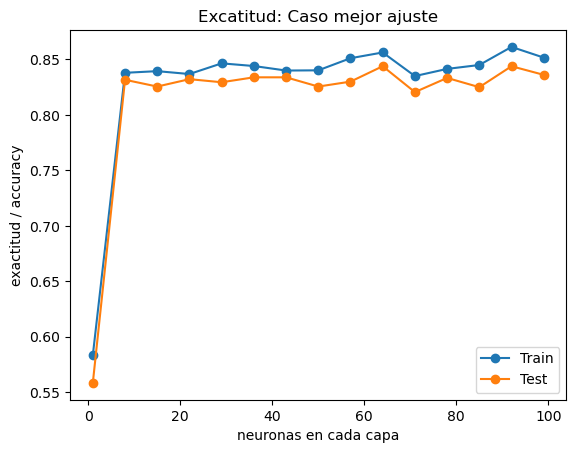

In [86]:
plt.plot(neuronas, train_scores[0:15], '-o', label='Train')
plt.plot(neuronas, test_scores[0:15], '-o', label= 'Test')
plt.legend()
plt.title('Excatitud: Caso mejor ajuste')
plt.xlabel('neuronas en cada capa')
plt.ylabel('exactitud / accuracy')
plt.show()

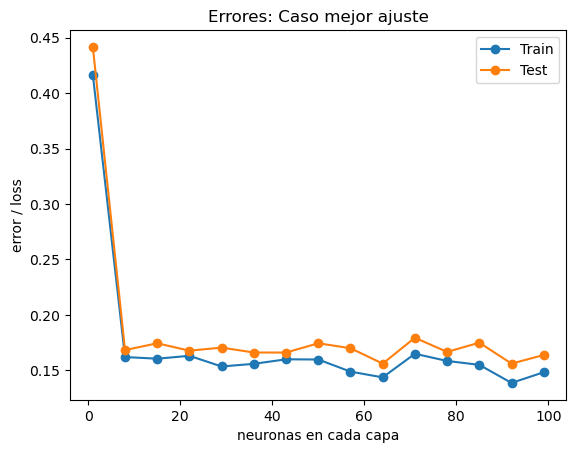

In [87]:
plt.plot(neuronas, train_errors[0:15], '-o', label='Train')
plt.plot(neuronas, test_errors[0:15], '-o', label='Test')
plt.legend()
plt.title('Errores: Caso mejor ajuste')
plt.xlabel('neuronas en cada capa')
plt.ylabel('error / loss')
plt.show()

In [88]:
modelo_NN_tmp = MLPClassifier(hidden_layer_sizes=(25,25), max_iter=1000)
modelo_NN_tmp.fit(X_train, y_train)
print(modelo_NN_tmp.score(X_validation, y_validation))

0.83


In [91]:
prn = modelo_NN_tmp.predict(X_validation)
confusion_matrix(y_validation, prn)

array([[906, 152],
       [154, 588]], dtype=int64)

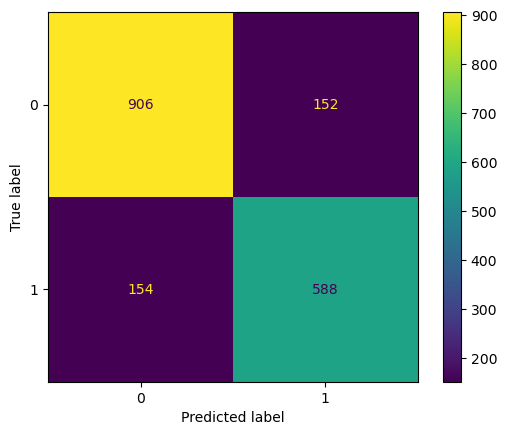

In [105]:
y_pred = modelo_NN_tmp.predict(X_validation)
cm = confusion_matrix(y_validation, prn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()

plt.show()

#### **El mejor modelo encontrado**

In [93]:
modelo_NN_tmp.score(X_test, y_test)

0.8327777777777777

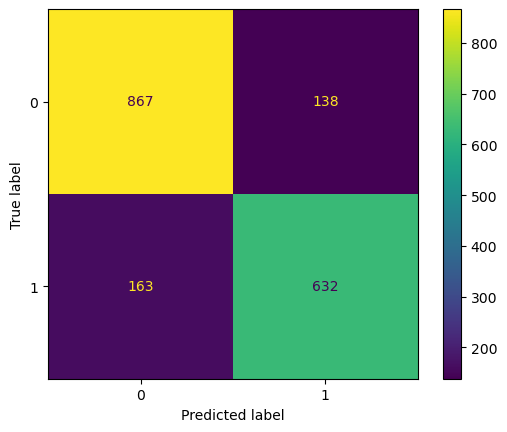

In [106]:
y_pred = modelo_NN_tmp.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1]) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()

plt.show()

6.a Justifica el uso de LabelEncoder o OneHotEcoder.

Transformación de variables categóricas

Justificación de OneHotEncoder vs LabelEncoder:

•	LabelEncoder: se utiliza cuando hay una relación entre los valores de la variable categórica, es decir, cuando los valores representan un orden. 

•	OneHotEncoder: se utiliza cuando no hay relación de orden entre los valores de la variable. 


13.a Incluye tus conclusiones de este problema en particular, ¿qué puedes decir acerca 
del uso de técnicas de inteligencia artificial en problemas de mercadotecnia?

Para este tipo de problemas de mercadotecnia, el uso de técnicas de inteligencia artificial como la regresión logística y las redes neuronales puede ofrecer ventajas para predecir el comportamiento del cliente, permitiendo una toma de decisiones más informada sobre a quién contactar para mejorar la efectividad de las campañas de marketing, sin embargo, siempre es importante tener la opinión de los expertos para determinar que estrategia es la mejor para cada caso.

Ya ajustando los hiperparámetros:

**Regresión logística:** Score:0.816 con el conjunto de validación

•	TN (892): 892 clientes fueron correctamente clasificados como "no suscribirán".

•	FP (166): 166 clientes fueron incorrectamente clasificados como "suscribirán" cuando en realidad no lo hicieron.

•	FN (165): 165 clientes fueron incorrectamente clasificados como "no suscribirán" cuando en realidad sí lo hicieron.

•	TP (577): 577 clientes fueron correctamente clasificados como "suscribirán".


**Red neuronal:** Score:0.83 con el conjunto de validación

•	TN (906): 906 clientes fueron correctamente clasificados como "no suscribirán".

•	FP (152): 152 clientes fueron incorrectamente clasificados como "suscribirán".

•	FN (154): 154 clientes fueron incorrectamente clasificados como "no suscribirán".

•	TP (588): 577 clientes fueron correctamente clasificados como "suscribirán".



Debido al score de validación y que los resultados en la matriz fueron mejores, se utilizó el modelo de red neuronal con los siguientes resultados:

**Score:** 0.833 con el conjunto de prueba

**TN (867):** 867 clientes fueron correctamente clasificados como "no suscribirán".

**FP (138):** 138 clientes fueron incorrectamente clasificados como "suscribirán".

**FN (163):** 163 clientes fueron incorrectamente clasificados como "no suscribirán".

**TP (632):** 632 clientes fueron correctamente clasificados como "suscribirán".